## BDC (Business Development Company) 投資
由Yahoo Finance 的一篇報導談起：
[10 BDC Dividend Stocks for Increased Income](https://finance.yahoo.com/news/10-bdc-dividend-stocks-increased-134943500.html)

另外還有其中引述[古根漢的分析](https://www.guggenheiminvestments.com/getattachment/Page-Types/UIT/BDCS010/An-Overview-of-Business-Development-Companies.pdf.aspx)

我們來摘要分析一下:
BDC(Business Development Company) 比較類似於投資私募跟創投的公司，近期逐漸吸引到收益投資人，也就是現金流投資人的眼光。。

通常他們的投資對象，是一些比較不容易從銀行或其他傳統金融機構借錢或融資的公司，似乎就像是台灣的租賃公司,如中租(5871)。貸放給這些公司，通常風險較高，但報酬也高。
為了要免除公司的稅負，他們必須要配出90%以上的收入。
就個人投資課稅而言，2019、2020年之股利實際查看預扣稅隔年退回的結果，投資某檔BDC實際稅率最高9%、最低3%，算是蠻有吸引力的地方。

就收益而言，根據前述古根漢的分析，在2017/11之前，年收益率達9%以上,相較其他的另類投資，如MLP的收益還要高．

以後再做一些近期績效與風險的分析......


In [7]:
!pip install yahoo_fin

In [8]:
from yahoo_fin.stock_info import *
from yahoo_fin.news import *
from yahoo_fin.options import *
import pandas as pd

In [9]:
# 抓外部資料
BDC = ['BKCC','SAR','PNNT','BBDC','TRIN','FDUS','GLAD','CSWC','MAIN','GAIN','ARCC']
BDC = pd.DataFrame(BDC, columns=['Ticker'])

today = pd.Timestamp.today()
start_date = today-datetime.timedelta(days=365*5)
BDC['Prices'] = BDC['Ticker'].apply(lambda x: get_data(x, start_date = start_date , end_date = today))
BDC['Stats'] = BDC['Ticker'].apply(lambda x: get_stats(x).set_index('Attribute')['Value'].to_dict())
BDC['Quote'] = BDC['Ticker'].apply(lambda x: get_quote_data(x))

In [10]:
# 從外部資料抓取需要欄位
BDC['Yield'] = [x.get('Forward Annual Dividend Yield 4') for x in BDC['Stats']]
BDC['PayRatio'] = [x.get('Payout Ratio 4') for x in BDC['Stats']]
BDC['Beta'] = [x.get('Beta (5Y Monthly)') for x in BDC['Stats']] 
BDC['Ex-Dividend Date'] = [x.get('Ex-Dividend Date 4') for x in BDC['Stats']]

BDC['Adj_Close'] = [x.get('adjclose') for x in BDC['Prices']]
BDC['Vol_3M'] = [x.get('averageDailyVolume3Month') for x in BDC['Quote']]
BDC['Price_50D'] = [round(x.get('fiftyDayAverage'),2) for x in BDC['Quote']]
BDC['Vol_Mil'] = round(BDC['Vol_3M'] * BDC['Price_50D']/1000000, 2)
BDC['PE'] =  [round(x.get('forwardPE'),2) for x in BDC['Quote']]
BDC['PB'] =  [round(x.get('priceToBook'),2) for x in BDC['Quote']]

In [11]:
BDC.columns

Index(['Ticker', 'Prices', 'Stats', 'Quote', 'Yield', 'PayRatio', 'Beta',
       'Ex-Dividend Date', 'Adj_Close', 'Vol_3M', 'Price_50D', 'Vol_Mil', 'PE',
       'PB'],
      dtype='object')

In [12]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-small',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

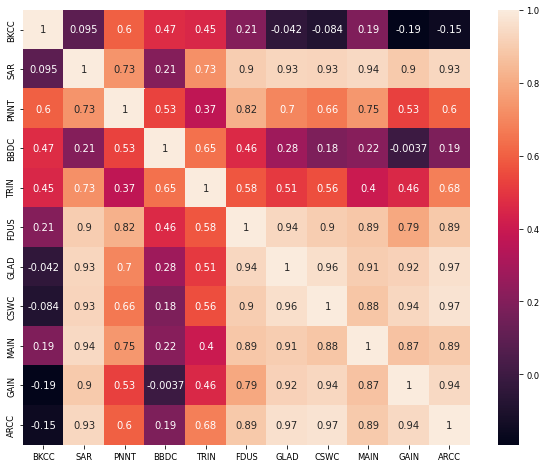

In [13]:
# 計算最近五年之相關係數
Prices_5Y = pd.concat(list(x for x in BDC['Adj_Close']), axis=1)
columns= BDC['Ticker'].to_list()
Prices_5Y.columns = columns
import matplotlib.pyplot as plt
import seaborn as sns
CORR = Prices_5Y.corr()
sns.heatmap(data=CORR, annot=True)

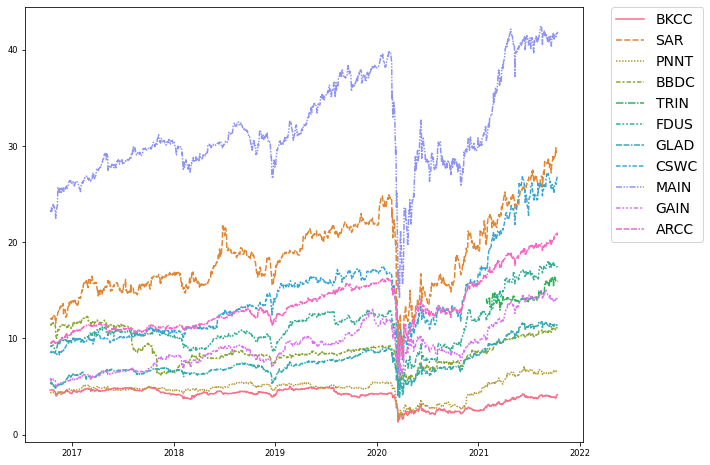

In [14]:
sns.lineplot(data=Prices_5Y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14})
sns.set(context = "talk")

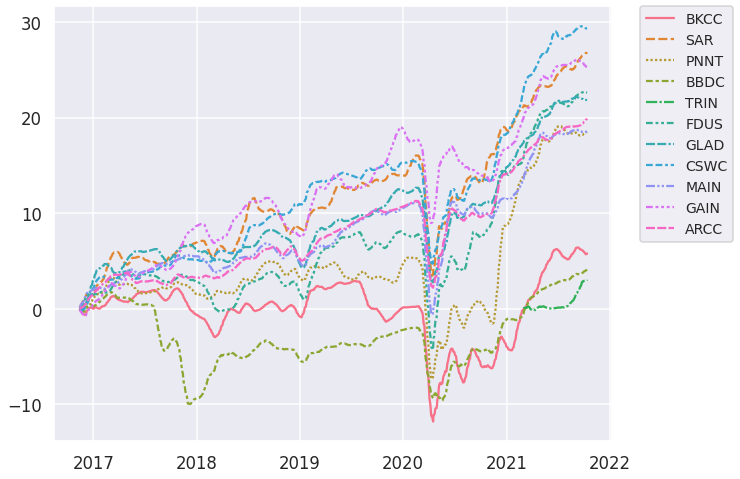

In [15]:
Prices_5Y_Pct = Prices_5Y.pct_change(21)
STD = Prices_5Y_Pct.std()
Prices_5Y_Pct = Prices_5Y_Pct.cumsum()
sns.lineplot(data=Prices_5Y_Pct)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14})
sns.set(context = "talk")

In [16]:
BDC['STD'] =  BDC['Ticker'].map(STD).map('{:,.2%}'.format)

In [17]:
BDC[['Ticker','Yield','PayRatio','Beta','STD','Vol_Mil','PE','PB','Ex-Dividend Date']]

,Ticker,Yield,PayRatio,Beta,STD,Vol_Mil,PE,PB,Ex-Dividend Date
0,BKCC,9.66%,111.11%,1.76,10.57%,1.31,10.62,0.88,"Sep 13, 2021"
1,SAR,7.13%,42.61%,1.69,10.62%,1.33,13.20,1.01,"Sep 12, 2021"
2,PNNT,7.29%,21.33%,1.98,11.76%,1.57,10.67,0.68,"Sep 15, 2021"
3,BBDC,7.58%,33.49%,0.66,7.93%,2.22,11.63,0.97,"Sep 06, 2021"
4,TRIN,8.26%,30.87%,NaN,3.86%,1.15,9.30,1.12,"Sep 28, 2021"
5,FDUS,7.11%,33.98%,1.96,10.99%,1.52,11.22,1.00,"Sep 12, 2021"
6,GLAD,6.85%,41.27%,1.42,8.31%,1.45,14.34,1.33,"Sep 20, 2021"
7,CSWC,7.00%,57.68%,1.25,8.83%,3.34,13.92,1.63,"Dec 13, 2021"
8,MAIN,6.02%,52.90%,1.47,9.43%,10.07,16.48,1.79,"Oct 27, 2021"
9,GAIN,5.94%,31.12%,1.54,9.00%,1.46,16.11,1.12,"Sep 20, 2021"


In [18]:
BDC.columns

Index(['Ticker', 'Prices', 'Stats', 'Quote', 'Yield', 'PayRatio', 'Beta',
       'Ex-Dividend Date', 'Adj_Close', 'Vol_3M', 'Price_50D', 'Vol_Mil', 'PE',
       'PB', 'STD'],
      dtype='object')

In [19]:
BDC.iloc[0].Quote

{'ask': 4.15,
 'askSize': 12,
 'averageAnalystRating': '3.0 - Hold',
 'averageDailyVolume10Day': 516057,
 'averageDailyVolume3Month': 327073,
 'bid': 4.1,
 'bidSize': 8,
 'bookValue': 4.684,
 'currency': 'USD',
 'displayName': 'BlackRock Capital Inv',
 'dividendDate': 1633478400,
 'earningsTimestamp': 1635969600,
 'earningsTimestampEnd': 1635969600,
 'earningsTimestampStart': 1635969600,
 'epsCurrentYear': 0.3,
 'epsForward': 0.39,
 'epsTrailingTwelveMonths': 0.426,
 'esgPopulated': False,
 'exchange': 'NMS',
 'exchangeDataDelayedBy': 0,
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'fiftyDayAverage': 4.005429,
 'fiftyDayAverageChange': 0.13457108,
 'fiftyDayAverageChangePercent': 0.03359717,
 'fiftyTwoWeekHigh': 4.47,
 'fiftyTwoWeekHighChange': -0.32999992,
 'fiftyTwoWeekHighChangePercent': -0.07382549,
 'fiftyTwoWeekLow': 2.32,
 'fiftyTwoWeekLowChange': 1.8199999,
 'fiftyTwoWeekLowChangePercent': 0.7844828,
 'fiftyTwoWeekRange': '2.32 - 4.47',
 'f

In [20]:
!pip install watermark

In [21]:
import watermark
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [23]:
%watermark --iversions

numpy     : 1.19.5
re        : 2.2.1
pandas    : 1.1.5
IPython   : 5.5.0
json      : 2.0.9
requests  : 2.23.0
seaborn   : 0.11.2
matplotlib: 3.2.2
feedparser: 6.0.8
watermark : 2.2.0

